# Campo de gravidade

Notebook que mostrará o campo de gravidade para o mundo inteiro, bem como a superfície geoidal. Estes cálculos irão servir para interpretarmos como o campo varia geograficamente e, posteriormente, calcularmos o distúrbio de gravidade. 

## Importando bibliotecas

Importando as bibliotecas que serão utilizadas para manipulação e visualização dos dados de gravidade.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import harmonica as hm
import cartopy.crs as ccrs

## Carregando os dados do modelo geopotencial XGM2019e

Dados baixados do [*International Center for Global Earth Models* (ICGEM)](http://icgem.gfz-potsdam.de/home).

In [2]:
fname = 'dataset/earth_gravity_XGM2019e.gdf'

In [3]:
data = hm.load_icgem_gdf(fname)

In [4]:
data

<xarray.Dataset>
Dimensions:        (latitude: 181, longitude: 361)
Coordinates:
  * longitude      (longitude) float64 -180.0 -179.0 -178.0 ... 179.0 180.0
  * latitude       (latitude) float64 -90.0 -89.0 -88.0 -87.0 ... 88.0 89.0 90.0
Data variables:
    h_over_geoid   (latitude, longitude) float64 2.745e+03 2.745e+03 ... 0.0 0.0
    gravity_earth  (latitude, longitude) float64 9.824e+05 ... 9.832e+05
Attributes: (12/32)
    generating_institute:  gfz-potsdam
    generating_date:       2023/03/22
    product_type:          gravity_field
    body:                  earth
    modelname:             XGM2019e_2159
    max_used_degree:       2190
    ...                    ...
    maxvalue:              9.8330378E+05 mgal
    minvalue:              9.7684704E+05 mgal
    signal_wrms:           1.5242402E+03 mgal
    grid_format:           long_lat_height_value
    attributes:            longitude latitude h_over_geoid gravity_earth
    attributes_units:      deg. deg. meter mgal

### Armazenando os dados em um array

In [5]:
lat = data.latitude
lon = data.longitude
gravity = data.gravity_earth

### Campo de gravidade para o mundo inteiro

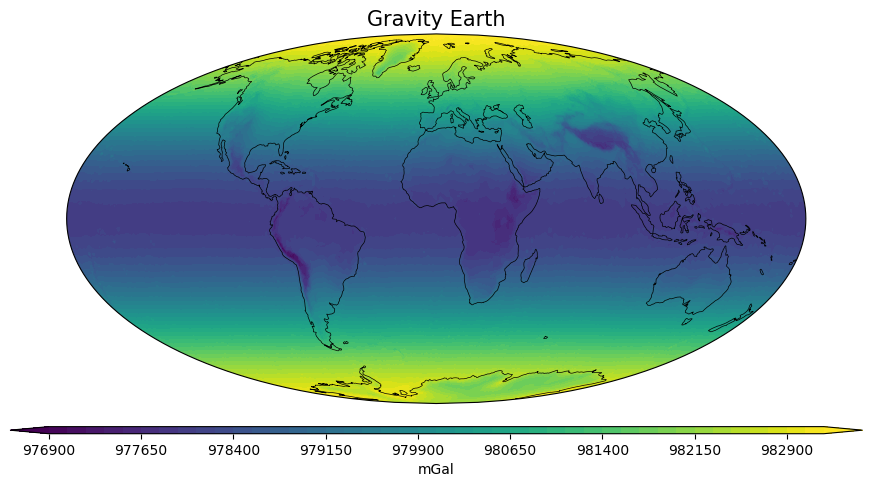

In [48]:
fig = plt.figure(figsize=(11,6))

ax = fig.add_subplot(projection=ccrs.Mollweide())
ax.coastlines(linewidth=0.5)
ax.set_global()
ax.set_title('Gravity Earth',fontsize=15)
cmap = ax.contourf(lon,lat,gravity,50,transform=ccrs.PlateCarree(),cmap='viridis',extend='both')
cbar = fig.colorbar(cmap,orientation='horizontal',pad=0.05,aspect=120,spacing='uniform',ax=ax)
cbar.set_label('mGal',fontsize=10)

plt.savefig('images/gravity_earth.png',dpi=200,bbox_inches='tight')
plt.show()